In [69]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
#df = pd.read_csv('/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 2/Data/automobile_data.csv')
df = pd.read_csv('/workspaces/DJS-compute-tasks/Task 2/Data/automobile_data.csv')

In [71]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [72]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [73]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [74]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [75]:
columns = [column for column in df]

In [76]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [77]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [78]:
df[df['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


**Here the '?' signifies null values which need to be managed.**

In [79]:
df.shape

(205, 26)

In [80]:
df.replace('?', np.nan, inplace=True)

In [81]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [82]:
columns_checking = ['normalized-losses','num-of-doors','bore','stroke','horsepower','peak-rpm','price']

def null_pecentage(df, columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_percentage = (df[col].isnull().sum() / len(df)) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"
    return result

null_percentage = null_pecentage(df, columns_checking)

for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")
    

normalized-losses: 20.0%
num-of-doors: 0.98%
bore: 1.95%
stroke: 1.95%
horsepower: 0.98%
peak-rpm: 0.98%
price: 1.95%


**Here the null percentage for rows of columns other than normalized-losses are very low, so the rows can be dropped safely**

In [83]:
df.dropna(subset = ['num-of-doors','bore','stroke','horsepower','peak-rpm','price'], inplace=True)

In [84]:
df.isnull().sum()

symboling             0
normalized-losses    34
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [85]:
df['normalized-losses'] = df['normalized-losses'].astype(float)

In [86]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,193.000000,159.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,121.132075,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,10.143627,25.326425,30.787565
std,1.235582,35.651285,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,3.977491,6.387828,6.816910
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,8.500000,19.000000,25.000000
50%,1.000000,113.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,9.000000,25.000000,30.000000
75%,2.000000,148.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [87]:
list = [df['normalized-losses'].mean(), df['normalized-losses'].median(), df['normalized-losses'].mode()]
list

[np.float64(121.13207547169812),
 np.float64(113.0),
 0    161.0
 Name: normalized-losses, dtype: float64]

In [88]:
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())

In [89]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [90]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [91]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.132075,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,121.132075,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,121.132075,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [92]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [93]:
df['num-of-doors']=df['num-of-doors'].map({'two' : 2, 'four' : 4})

In [94]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [95]:
df['num-of-cylinders']=df['num-of-cylinders'].map({'six' : 6, 'four' : 4, 'five' :5, 'three':3,'twelve':12,'eight': 8})

In [96]:
df[['bore','stroke','horsepower','peak-rpm','price','num-of-doors','num-of-cylinders']] = df[['bore','stroke','horsepower','peak-rpm','price','num-of-doors','num-of-cylinders']].astype(float)

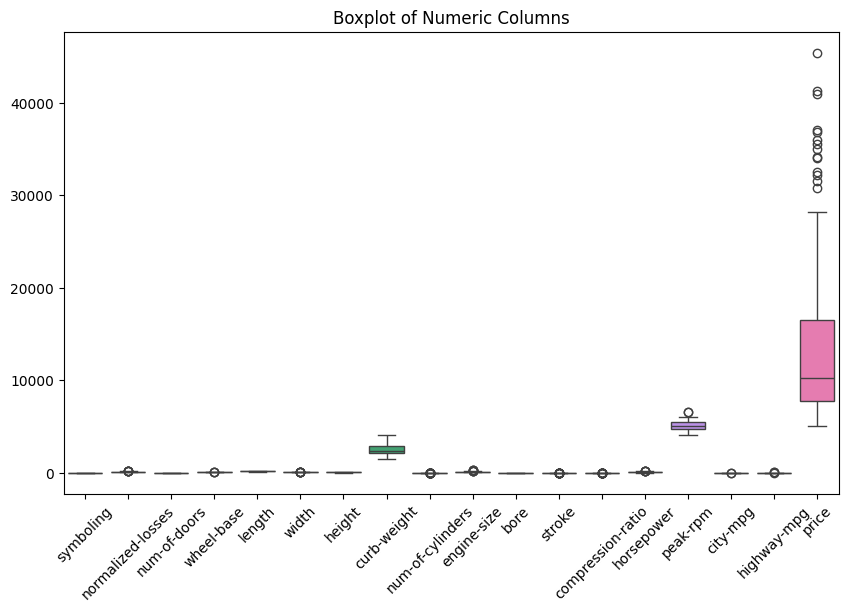

In [97]:

numeric_columns = df.select_dtypes(include=[float, int]).columns

# Create a boxplot for all numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])

# Customize plot
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Columns')
plt.show()


In [98]:
Q1 = df['price'].quantile(0.25)  # 25th percentile
Q3 = df['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

upper_bound = Q3 + 1.5 * IQR

df['price'] = df['price'].apply(lambda x: min(x, upper_bound))

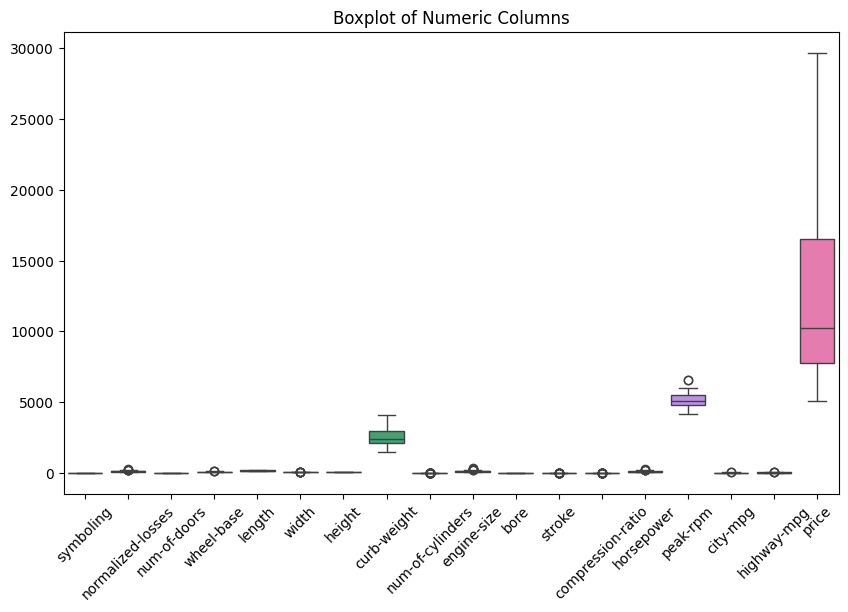

In [99]:

numeric_columns = df.select_dtypes(include=[float, int]).columns

# Create a boxplot for all numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])

# Customize plot
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Columns')
plt.show()


In [100]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders     float64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [101]:
nonnumeric = ['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']

**Using OneHot encoder to encode all the non numeric values before using PCA**

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
encoder = OneHotEncoder(sparse_output=False)

In [104]:
encoded_data = encoder.fit_transform(df[nonnumeric])

In [105]:
# df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(nonnumeric))
df_encoded = pd.get_dummies(df, columns=nonnumeric)

In [106]:
df_encoded.shape

(193, 65)

In [107]:
df.shape

(193, 26)

In [108]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [109]:
df_encoded.isnull().sum()

symboling                 0
normalized-losses         0
num-of-doors              0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
stroke                    0
compression-ratio         0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
price                     0
make_alfa-romero          0
make_audi                 0
make_bmw                  0
make_chevrolet            0
make_dodge                0
make_honda                0
make_isuzu                0
make_jaguar               0
make_mazda                0
make_mercedes-benz        0
make_mercury              0
make_mitsubishi           0
make_nissan               0
make_peugot               0
make_plymouth             0
make_porsche              0
make_saab                 0
make_subaru         

In [110]:
df_combined = pd.concat([df.drop(columns=nonnumeric).reset_index(allow_duplicates=False, drop=True), df_encoded.reset_index(allow_duplicates=False,drop=True)], axis=1)
df_combined.isnull().sum()

symboling                 0
normalized-losses         0
num-of-doors              0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
stroke                    0
compression-ratio         0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
price                     0
symboling                 0
normalized-losses         0
num-of-doors              0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
stroke                    0
compression-ratio         0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
price               

**Doubt: Before combining both dfs had no null values so why null values now??**

In [111]:
df_combined.dropna(inplace=True)

In [112]:
df_combined = df_combined.reset_index()

In [113]:
df_combined = df_combined.drop('index',axis=1)

In [114]:
df_combined.to_csv('final_data.csv', index=False)

In [115]:
df_combined.shape

(193, 83)

In [116]:
X = df_combined.drop(['price'], axis=1)
y = df_combined['price']

In [117]:
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import scale 
pca = PCA(n_components=0.98)
X_reduced = pca.fit_transform(scale(X))

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LinearRegression()


In [118]:
column_names = [f'PC{i+1}' for i in range(X_reduced.shape[1])]
X_reduced_train_df = pd.DataFrame(X_reduced, columns=column_names)
X_reduced_train_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
0,-0.346193,-5.109518,0.915387,3.450222,0.521757,2.888891,1.930870,2.850773,-1.194354,-5.418975,4.264986,-2.426241,-1.418889,2.443056,-0.898492,-1.727208,4.288754,-0.630535,-0.936469,-0.925488,-0.307690,-0.807611,0.832946,1.088784,1.093951,1.014374,0.898864,0.996406,0.516255,-0.028312,0.469586,-0.450480,-0.446656,0.413894,0.139625,0.326975,0.335361,0.058138
1,-0.346193,-5.109518,0.915387,3.450222,0.521757,2.888891,1.930870,2.850773,-1.194354,-5.418975,4.264986,-2.426241,-1.418889,2.443056,-0.898492,-1.727208,4.288754,-0.630535,-0.936469,-0.925488,-0.307690,-0.807611,0.832946,1.088784,1.093951,1.014374,0.898864,0.996406,0.516255,-0.028312,0.469586,-0.450480,-0.446656,0.413894,0.139625,0.326975,0.335361,0.058138
2,1.556834,-3.885110,1.722110,-0.312714,-2.238154,2.589773,0.256356,2.263571,-2.343641,-1.683236,1.072874,-1.180359,-0.561843,3.292498,-0.753918,-1.870645,1.598474,-0.934374,-0.647306,0.207994,0.505389,-1.853782,-0.728752,-0.637721,-1.941460,-0.162946,1.913879,3.320546,1.569458,-1.501566,3.960037,-0.604736,0.149016,-0.587503,-0.165512,0.320204,-1.330474,-0.718124
3,-0.380507,-0.641593,-0.228118,-2.244533,0.543546,-0.802937,2.329752,-3.104986,-0.473413,-0.968304,-0.507451,1.024685,-0.998618,-1.056713,0.261073,-1.214432,-0.322825,-1.577574,1.553891,-2.604417,0.167867,-1.195981,0.726953,0.452321,-0.350029,1.723904,-0.026677,0.476395,-0.149958,-0.168180,-0.337371,0.069734,1.033615,-0.523010,-0.387554,0.439228,0.715724,-0.716853
4,1.871409,-1.780998,-1.166935,-1.716695,0.765989,-0.316439,1.359032,-2.929921,-1.321860,-1.111490,-0.481734,1.761511,-1.615978,-1.728427,0.456070,-3.426710,-1.517338,-2.130784,1.020388,-2.388847,1.093338,-2.157769,0.415896,1.794189,-1.341569,-0.232923,0.874143,-1.615592,0.337860,-1.327726,0.712660,1.000720,0.246134,0.166409,0.029338,0.002363,0.904177,-0.105903


In [119]:
X.head(5)

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,121.132075,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111.0,5000.0,21,27,3,121.132075,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111.0,5000.0,21,27,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False
1,3,121.132075,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111.0,5000.0,21,27,3,121.132075,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111.0,5000.0,21,27,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False
2,1,121.132075,2.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154.0,5000.0,19,26,1,121.132075,2.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154.0,5000.0,19,26,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,2,164.000000,4.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102.0,5500.0,24,30,2,164.000000,4.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102.0,5500.0,24,30,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,2,164.000000,4.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115.0,5500.0,18,22,2,164.000000,4.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115.0,5500.0,18,22,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False


In [120]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([22.27, 33.79, 40.61, 46.18, 50.39, 54.19, 57.83, 60.64, 63.4 ,
       65.98, 68.32, 70.5 , 72.5 , 74.43, 76.24, 78.01, 79.7 , 81.25,
       82.69, 84.1 , 85.45, 86.73, 87.98, 89.2 , 90.28, 91.32, 92.21,
       93.08, 93.83, 94.56, 95.21, 95.78, 96.25, 96.7 , 97.12, 97.51,
       97.84, 98.15])

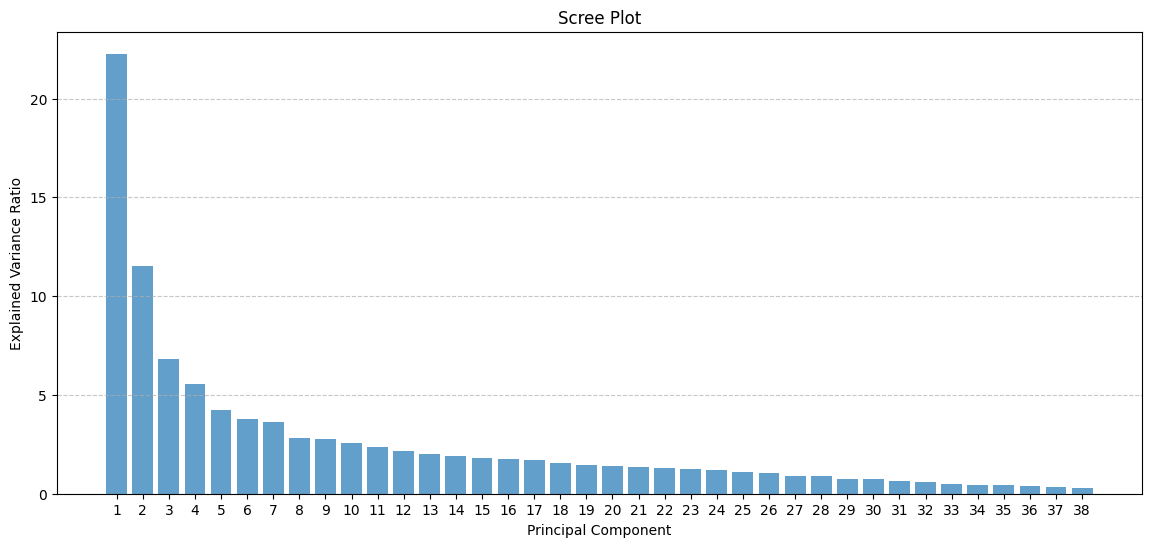

In [121]:
explained_variance = pca.explained_variance_ratio_*100

plt.figure(figsize=(14, 6))
plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.07,random_state=0) 

In [123]:
mses = []
for i in range(1,37):
    X_reduced_train = pca.fit_transform(scale(X_train))[:,:i]
    X_reduced_test = pca.transform(scale(X_test))[:,:i] 
    model.fit(X_reduced_train, y_train)
    pred = model.predict(X_reduced_test)
    mses.append(mean_squared_error(y_test, pred))
print(len(mses))
for i in range(1,36):
    print(f'{i} : {np.sqrt(mses[i])}')

36
1 : 3470.353110587855
2 : 3374.1064195760578
3 : 3322.0545338116867
4 : 3147.624140175285
5 : 2946.290369176095
6 : 2512.3230587499393
7 : 2441.6220476602603
8 : 2449.80509819558
9 : 2535.269941276844
10 : 2580.4421494581347
11 : 2603.4848684856897
12 : 2782.1867102079464
13 : 2776.648869026669
14 : 2776.3761765095255
15 : 2809.759789744765
16 : 2815.5113074364426
17 : 2711.6187657799605
18 : 2661.8324325953085
19 : 2656.5650901881345
20 : 2677.8043928325924
21 : 2626.96612273599
22 : 2657.5353432842608
23 : 2392.522586708771
24 : 2423.203872784601
25 : 2446.0901219045018
26 : 2489.1620179777146
27 : 2488.1062266171416
28 : 2498.8302055267077
29 : 2510.2530097938034
30 : 2557.601846479808
31 : 2459.6032277461427
32 : 2535.7800729570404
33 : 2421.9361485449995
34 : 2451.1285435904665
35 : 2456.552206362951


In [124]:
rmses = [np.sqrt(mse) for mse in mses]

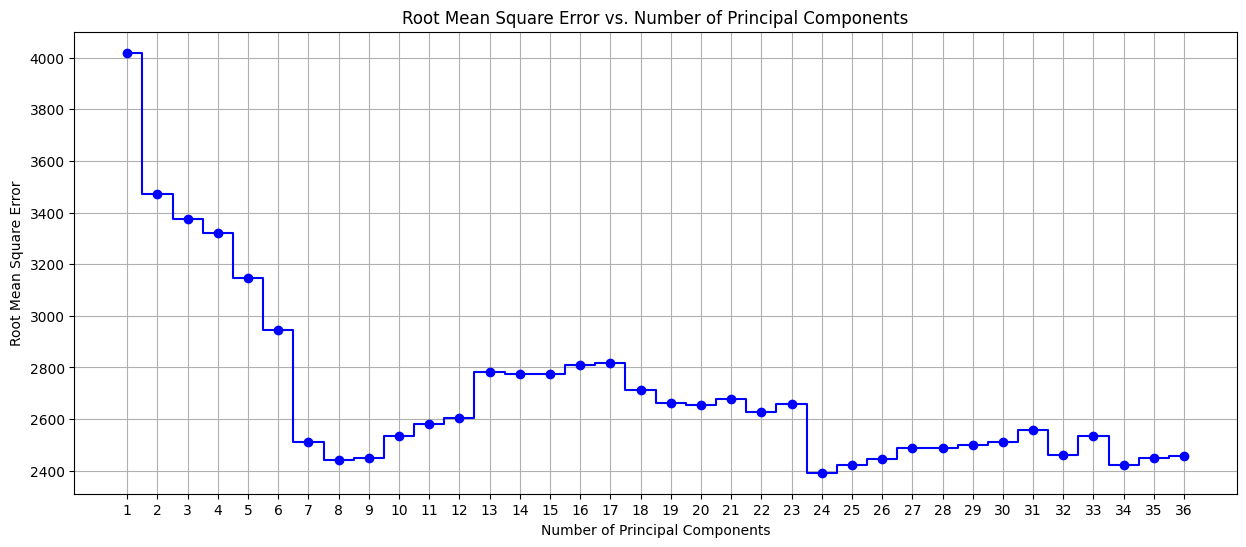

In [125]:
plt.figure(figsize=(15, 6))
#Searched for cooler seaborn.lineplot and i found this lol
plt.step(range(1, 37), rmses, where='mid', color='b', linestyle='-', marker='o')
plt.title('Root Mean Square Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Root Mean Square Error')
plt.grid(True)
plt.xticks(range(1, 37))
plt.show()


In [126]:
X_reduced_train = pca.fit_transform(scale(X_train))[:,:24]
X_reduced_test = pca.transform(scale(X_test))[:,:24] 

In [127]:
model.fit(X_reduced_train, y_train)

LinearRegression()

In [128]:
pred = model.predict(X_reduced_test)

In [129]:
mse = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

Mean Squared Error: 5724164.327911628
Root Mean Squared Error: 2392.522586708771


In [130]:
print(np.sqrt(mse) / df_combined['price'].mean())

price    0.186493
price    0.186493
dtype: float64


In [131]:
mean_pred = y_train.mean()
baseline_mse = mean_squared_error(y_test, [mean_pred] * len(y_test))
print(f"Baseline MSE (mean predictor): {baseline_mse}")


Baseline MSE (mean predictor): 60650582.97095126


In [132]:
mse

np.float64(5724164.327911628)

In [133]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")


R-squared: 0.9052770659915127


In [134]:
from sklearn.metrics import mean_absolute_error

# Assuming y_test contains the actual values and pred contains the predicted values
mae = mean_absolute_error(y_test, pred)

print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1682.8748503692325


In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2

# Create a polynomial features transformer
poly_features = PolynomialFeatures(degree=degree)

# Create a linear regression model
linear_reg = LinearRegression()

# Create a pipeline that combines the polynomial features with linear regression
model = make_pipeline(poly_features, linear_reg)

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 48536.74442431673
